In [147]:
import numpy as np
import pandas as pd
import re


def load_everything():
    xls = pd.ExcelFile('Energy_Indicators.xls')
    Energy = xls.parse(skiprows =17, skip_footer = 38)
    Energy = Energy [["Unnamed: 2", "Petajoules", "Gigajoules", "%"]]
    Energy.columns = ["Country", "Energy supply", "Energy supply per capita", "% Renewable"]
    Energy.replace("...", np.NaN, inplace = True)
    Energy["Energy supply"]= Energy["Energy supply"] * 1000000
    #df.replace({'a' : { 'Medium' : 2, 'Small' : 1, 'High' : 3 }})
    Energy["Country"].replace(to_replace = "[0-9]", value = "", 
                      regex = True, inplace = True )
    Energy["Country"].replace(to_replace = " \([a-zA-Z ]*\)", value = "",
                      regex =True, inplace = True)
    #df['pricing'](to_replace="\$([0-9,\.]+).*", value=r"\1", regex=True, inplace=True)
    Energy.replace({"Country" : { "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong" }}, inplace = True)
    
    GDP = pd.read_csv("world_bank.csv", skiprows = 4)
    GDP.replace({"Country Name" : {"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", 
    "Hong Kong SAR, China": "Hong Kong"}}, inplace = True)
    xls2 = pd.ExcelFile('scimagojr-3.xlsx')
    ScimEn = xls2.parse()

    merge1 = ScimEn.merge(Energy, how="inner", on= "Country")
    merge2 = merge1.merge(GDP, how = "inner", left_on = "Country", right_on = "Country Name")
    #df = df.drop('column_name', 1)
    complete_merge = merge2 [['Rank', 'Country', 'Documents', 'Citable documents', 'Citations',
       'Self-citations', 'Citations per document', 'H index', 'Energy supply',
       'Energy supply per capita', '% Renewable', "2006", 
        "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"]]
    complete_merge = complete_merge.set_index("Country")
    reduced_merge = complete_merge.head(15)

    return (reduced_merge, complete_merge)

def answer_one():
    return load_everything()[0]
    

answer_one()


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy supply,Energy supply per capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [150]:
def answer_two():
    #(reduced, complete) = load_everything()
    return complete_merge.size -reduced_merge.size

answer_two()

2940

In [129]:
def answer_three():
    df = load_everything()[0]
    df["avgGDP"] = df.iloc[:,10:].mean(axis=1, skipna=True)
    return df["avgGDP"]

#answer_three()



In [131]:
def answer_four():
    df = load_everything()[0]
    df["avgGDP"] = df.iloc[:,10:].mean(axis=1, skipna=True)
    sixth_largest_avggdp = df.nlargest(6, "avgGDP").iloc[-1]
    return sixth_largest_avggdp["2015"] - sixth_largest_avggdp["2006"]

#answer_four()


In [132]:
def answer_five():
    df = load_everything()[0]
    return df["Energy supply per capita"].mean()

#answer_five()


157.6

In [133]:
def answer_six():
    df = load_everything()[0]
    return (df["% Renewable"].idxmax(), df["% Renewable"].max())

#answer_six()


('Brazil', 69.648030000000006)

In [134]:
def answer_seven():
    df = load_everything()[0]
    df["Ratio"] = df["Self-citations"] / df["Citations"]
    return df["Ratio"].idxmax(), df["Ratio"].max()

#answer_seven()


('China', 0.68931261793894216)

In [136]:
def answer_eight():
    df = load_everything()[0]
    df["Estimated Population"] = df["Energy supply"] / df["Energy supply per capita"]
    return df.nlargest(3, "Estimated Population").iloc[-1].name

#answer_eight()  


In [137]:
def answer_nine():
    df = load_everything()[0]
    df["Estimated Population"] = df["Energy supply"] / df["Energy supply per capita"]
    df["Citable Documents per Person"] = df["Citable documents"] / df["Estimated Population"]
    return df["Energy supply per capita"].corr(df["Citable Documents per Person"])

#answer_nine()


0.79400104354429424

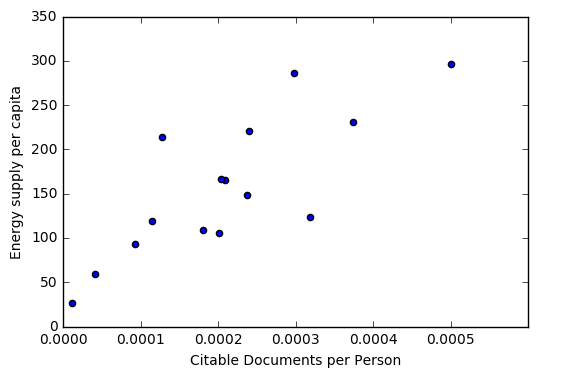

In [138]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    df["Estimated Population"] = df["Energy supply"] / df["Energy supply per capita"]
    df["Citable Documents per Person"] = df["Citable documents"] / df["Estimated Population"]
    df.plot(x='Citable Documents per Person', y='Energy supply per capita', kind='scatter', xlim=[0, 0.0006])

#plot9()


In [140]:
def answer_ten():
    df["HighRenew"] = np.where(df["% Renewable"] >= df["% Renewable"].median(),1,0)
    df_rank = df.sort_values(by = "Rank", ascending = True)
    HighRenew = df_rank["HighRenew"]
    return df["HighRenew"]
#answer_ten()

In [141]:
df = load_everything()[0]
df["Estimated Population"] = df["Energy supply"] / df["Energy supply per capita"]

ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

continent_df = pd.DataFrame(list(ContinentDict.items()), columns= ["Country", "Continent"]).set_index("Country")
df_with_continent = df.merge(continent_df, how = "inner", left_index = "True", right_index = "True")

def answer_eleven():
    df = df_with_continent
    continents = df.groupby("Continent").agg({"Continent":np.size, "Estimated Population" : [np.sum, np.mean, np.std]})
    continents.columns = continents.columns.droplevel()
    return continents

#answer_eleven()

In [143]:
def answer_twelve():
    df = df_with_continent
    df["Renewable bins"] = pd.cut(df["% Renewable"], bins=5, labels=["0","1","2","3","4"])
    df2 = df.groupby(["Continent", "Renewable bins"]).agg({"Renewable bins" : np.size}).iloc[:,0]
    #df2.columns = df2.columns.droplevel()
    return df2
#answer_twelve()    

In [144]:
def answer_thirteen():
    df = df_with_continent
    #locale.setlocale(locale.LC_ALL, 'German')
    df["PopEst"] = df["Estimated Population"].apply(lambda x: format(x,',f'))
    return df["PopEst"]

#answer_thirteen()